# Arytmetyka komputerowa
## Laboratorium 1 - Metody Obliczeniowe w Nauce i Technice

## Zadanie 1. Sumowanie liczb pojedynczej precyzji

1.

In [1]:
import numpy as np

N = 10**7
V = 0.4202137
EXACT_VALUE = N * V

def iterate_sum(v):
    array = np.full(N, v, dtype=np.single)
    result = np.single(0.0)
    for x in array: result += x
    
    return result

computed_value = iterate_sum(V)
computed_value

4466364.5

2.

In [2]:
# absolute error
abs_error = abs(EXACT_VALUE - computed_value)
print(f"Absolute approximation error: {abs_error}")

# relative error
rel_error = abs_error / EXACT_VALUE * 100
print(f"Relative approximation error: {rel_error}")

Absolute approximation error: 264227.5
Relative approximation error: 6.287931592901422


Błąd względny jest duży z powodu ograniczonej liczby bitów w mantysie, w pewnym momencie brakuje pamięci na przechowywanie dokładnej wartości częściowej sumy, dlatego suma w ostateczności traci dokładność.

3.

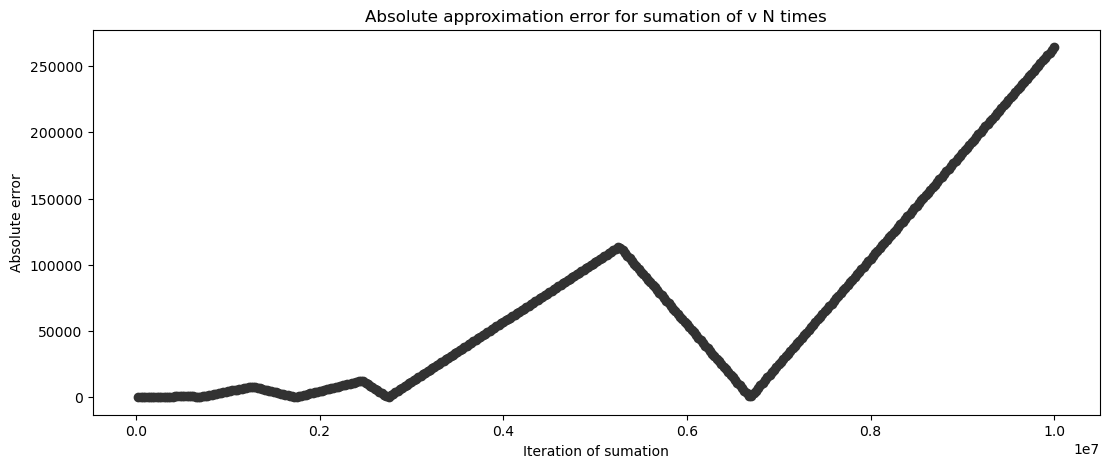

In [8]:
import matplotlib.pyplot as plt

STEP = 25000

steps = np.array([x for x in range(STEP, N + 1, STEP)])
errors = np.empty(N // STEP, dtype=np.double)

result = np.single(0.0)
for i in range(1, N + 1):
    if i % STEP == 0:
        errors[i // STEP - 1] = np.abs(result - i * V)
    result += np.single(V)
    
fig, ax = plt.subplots(figsize=(13, 5))
ax.scatter(steps, errors, color="#323232")
ax.set_xlabel("Iteration of sumation")
ax.set_ylabel("Absolute error")
plt.title("Absolute approximation error for sumation of v N times")
plt.show()

Na wykresie można zaobserowawać systematyczne redukcje błędów bezwzględnych, wraz z każdą kolejną operacją dodawania maksimum lokalne jest coraz większe.

4.

In [4]:
def recursive_sum(array):
    def r(array, i, j):
        if j - i == 0:
            return array[i]
        if j - i == 1:
            return array[i] + array[j]
        
        mid = i + ((j - i + 1) // 2 - 1)
        return r(array, i, mid) + r(array, mid + 1, j)
    
    return r(array, 0, len(array) - 1)

computed_value_rec = recursive_sum(np.full(N, V, dtype=np.single))
computed_value_rec

4202137.0

5.

In [8]:
# absolute error
abs_error_rec = abs(EXACT_VALUE - computed_value_rec)
print(f"Absolute approximation error: {abs_error_rec}")

# relative error
rel_error_rec = abs_error_rec / EXACT_VALUE * 100
print(f"Relative approximation error: {rel_error_rec}")

Absolute approximation error: 0.0
Relative approximation error: 0.0


Błędy przybliżeń zmalały do 0, ponieważ algorytm dzieli składniki na mniejsze liczby, dzięki temu zmniejszamy ryzyko wystąpienia `overflow` lub `underflow`. W przypadku wcześniejszego algorytmu sumy dochodziło do sytuacji kiedy dodawaliśmy dużą liczbę z małą.

6.

In [14]:
from datetime import datetime

# Iterate sum
iterate_start = datetime.timestamp(datetime.now())
iterate_sum(V)
iterate_end = datetime.timestamp(datetime.now())

# Recursive sum
recursive_start = datetime.timestamp(datetime.now())
recursive_sum(np.full(N, V, dtype=np.single))
recursive_end = datetime.timestamp(datetime.now())

print(f"Iterate sum execution time: {iterate_end - iterate_start} s")
print(f"Recursive sum execution time: {recursive_end - recursive_start} s")

Iterate sum execution time: 1.281013011932373s
Recursive sum execution time: 4.7049829959869385s


7.

In [12]:
array = np.array([99999999, 0.00000000000000000001], dtype=np.single)
recursive_sum(array)

100000000.0

# Zadanie 2. Algorytm Kahana

1.

In [16]:
def kahan_sum(array):
    _sum, err = np.single(0.0), np.single(0.0)
    for x in array:
        y = np.single(x - err)
        temp = np.single(_sum + y)
        err = temp - _sum - y
        _sum = temp
        
    return _sum

computed_value = kahan_sum(np.full(N, V, dtype=np.single))
computed_value

4202137.0

In [ ]:
# absolute error
abs_error = abs(EXACT_VALUE - computed_value)
print(f"Absolute approximation error: {abs_error}")

# relative error
rel_error = abs_error / EXACT_VALUE * 100
print(f"Relative approximation error: {rel_error}")

2.

Algorytm Kahana jest bardziej dokładny od zwykłego sumowania element po elemencie, ponieważ przechowuje niedokładność w zmiennej `err`, która występuje przy dodawaniu bardzo dużej i bardzo małej liczby.

3.

In [17]:
# Kahan's sum
kahan_start = datetime.timestamp(datetime.now())
kahan_sum(np.full(N, V, dtype=np.single))
kahan_end = datetime.timestamp(datetime.now())

# Recursive sum
recursive_start = datetime.timestamp(datetime.now())
recursive_sum(np.full(N, V, dtype=np.single))
recursive_end = datetime.timestamp(datetime.now())

print(f"Kahan's sum execution time: {kahan_end - kahan_start} s")
print(f"Recursive sum execution time: {recursive_end - recursive_start} s")

Iterate sum execution time: 12.637998104095459 s
Recursive sum execution time: 4.786013841629028 s


# Zadanie 3. Sumy częściowe

In [ ]:
# Zeta Riemann's function (forward iteration)
def zeta(s, n):
    result = np.single(0.0)
    for k in range(1, n + 1):
        result += np.single(1 / k**s)
        
    return result

# Zeta Riemann's function (backward iteration)
def zeta_reversed(s, n):
    result = np.single(0.0)
    for k in range(n, 0, -1):
        result += np.single(1 / k**s)
        
    return result

# Eta Dirichlet's function (forward iteration)
def eta(s, n):
    result = np.single(0.0)
    for k in range(1, n + 1):
        result += np.single((-1)**(k - 1) * 1 / k**s)
        
    return result

# Eta Dirichlet's function (backward iteration)
def eta_reversed(s, n):
    result = np.single(0.0)
    for k in range(n, 0, -1):
        result += np.single((-1)**(k - 1) * 1 / k**s)
        
    return result

In [ ]:
import pandas as pd

array = np.array([[2, 3.6667, 5, 7.2, 10], [50, 100, 200, 500, 1000]])

# s = 10, n = 100
print("s = 10, n = 100")
print(f"zeta()\t\t{zeta(10, 100)}")
print(f"zeta_reversed()\t{zeta_reversed(10, 100)}")
print(f"eta()\t\t{eta(10, 100)}")
print(f"eta_reversed()\t{eta_reversed(10, 100)}\n")

# s = 3.6667, n = 100
print("s = 3.6667, n = 100")
print(f"zeta()\t\t{zeta(3.6667, 100)}")
print(f"zeta_reversed()\t{zeta_reversed(3.6667, 100)}")
print(f"eta()\t\t{eta(3.6667, 100)}")
print(f"eta_reversed()\t{eta_reversed(3.6667, 100)}")